In [1]:
%matplotlib inline

import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable

from resspect import cosmo_metric_utils as cmu

In [2]:
file_extension =  'wfd' #'ddf'

# list of numbered files 
files = glob.glob('/media2/RESSPECT2/data/posteriors_wfd/omprior_0.01_flat/summary_cases_omprior_0.01_flat_redone*.csv')

dist_loc_base = '/media/RESSPECT/data/PLAsTiCC/for_metrics/' + file_extension + \
                '/distances/omprior_0.01_flat/emille_samples/*' #mu_photoIa_plasticc*'

if 'wfd' in file_extension:
    table_loc = '/media2/RESSPECT2/data/posteriors_wfd/omprior_0.01_flat/summary_cases_omprior_0.01_flat_redone.csv'
else:
    table_loc = '/media2/RESSPECT2/data/posteriors_ddf/omprior_0.01_flat/summary_cases_emille.csv' 

# list of stan input files
dist_loc_files = glob.glob(dist_loc_base)

# read summary table for the non-numbered case
df = pd.read_csv(table_loc)

In [116]:
from collections import OrderedDict

if 'wfd' in file_extension:
    remap_dict = OrderedDict({
                              'perfect3000': 'Perfect', 
                              'fiducial3000': 'Fiducial', 
                              #'random3000fail2998': 'Random',
                              'random3000': 'Random',
                              #'all_objs_survived_SALT2_DDF' : 'All SALT',
                              #'all_objs_survived_SALT2_WFD': 'All SALT',
                              #'50SNIa50SNII': 'SN-II 50',
                              #'68SNIa32SNII': 'SN-II 32',
                              '72SNIa28SNII': 'SN-II 28',
                              '75SNIa25SNII': 'SN-II 25', 
                              '90SNIa10SNII': 'SN-II 10',
                              '95SNIa5SNII': 'SN-II 5',
                              '98SNIa2SNII': 'SN-II 2',
                              '99SNIa1SNII': 'SN-II 1',
                              #'50SNIa50SNIbc': 'SN-Ibc 50',
                              #'68SNIa32SNIbc': 'SN-Ibc 32',
                              #'75SNIa25SNIbc': 'SN-Ibc 25',
                              #'83SNIa17SNIbc': 'SN-Ibc 17',
                              '90SNIa10SNIbc': 'SN-Ibc 10',
                              '95SNIa5SNIbc': 'SN-Ibc 5',
                              '98SNIa2SNIbc': 'SN-Ibc 2',
                              '99SNIa1SNIbc': 'SN-Ibc 1',
                              #'50SNIa50SNIax': 'SN-Iax 50',
                              #'68SNIa32SNIax': 'SN-Iax 32',
                              '75SNIa25SNIax': 'SN-Iax 25',
                              #'86SNIa14SNIax': 'SN-Iax 14',
                              '90SNIa10SNIax': 'SN-Iax 10',
                              #'94SNIa6SNIax': 'SN-Iax 6',
                              '95SNIa5SNIax': 'SN-Iax 5',
                              #'97SNIa3SNIax': 'SN-Iax 3',
                              '98SNIa2SNIax': 'SN-Iax 2',
                              '99SNIa1SNIax': 'SN-Iax 1',
                              #'71SNIa29SNIa-91bg': 'SN-Ia-91bg 29',
                              #'75SNIa25SNIa-91bg': 'SN-Ia-91bg 25',
                              #'90SNIa10SNIa-91bg': 'SN-Ia-91bg 10',
                              '95SNIa5SNIa-91bg': 'SN-Ia-91bg 5',
                              '98SNIa2SNIa-91bg': 'SN-Ia-91bg 2',
                              '99SNIa1SNIa-91bg': 'SN-Ia-91bg 1',
                              #'99.8SNIa0.2SNIa-91bg': 'SN-Ia-91bg 0.2',
                              #'57SNIa43AGN': 'AGN 43',
                              #'75SNIa25AGN': 'AGN 25',
                              #'90SNIa10AGN': 'AGN 10',
                              #'94SNIa6AGN': 'AGN 6',
                              '95SNIa5AGN': 'AGN 5',
                              '98SNIa2AGN': 'AGN 2',
                              '99SNIa1AGN': 'AGN 1',
                              #'99.9SNIa0.1AGN': 'AGN 0.1',
                              #'83SNIa17SLSN-I': 'SNLS-I 17',
                              #'90SNIa10SLSN-I': 'SNLS-I 10',
                              #'95SNIa5SLSN-I': 'SNLS-I 5',
                              #'98SNIa2SLSN-I': 'SNLS-I 2',
                              #'99SNIa1SLSN-I': 'SNLS-I 1',
                              #'99.9SNIa0.1SLSN': 'SNLS-I 0.1',
                              #'95SNIa5TDE': 'TDE 5',
                              #'98SNIa2TDE': 'TDE 2',
                              #'99SNIa1TDE': 'TDE 1',
                              '99.6SNIa0.4TDE': 'TDE 0.4',
                              #'99.1SNIa0.9CART': 'CART 0.9',
                              '99.7SNIa0.3CART': 'CART 0.3',
                  })

remap_dict_ddf = OrderedDict({
                          'perfect3000': 'Perfect', 
                          'fiducial3000': 'Fiducial', 
                          #'random3000fail2998': 'Random',
                          'random3000': 'Random',
                          #'all_objs_survived_SALT2_DDF' : 'All SALT',
                          #'all_objs_survived_SALT2_WFD': 'All SALT',
                          #'50SNIa50SNII': 'SN-II 50',
                          #'68SNIa32SNII': 'SN-II 32',
                          '72SNIa28SNII': 'SN-II 28',
                          '75SNIa25SNII': 'SN-II 25', 
                          '90SNIa10SNII': 'SN-II 10',
                          '95SNIa5SNII': 'SN-II 5',
                          '98SNIa2SNII': 'SN-II 2',
                          '99SNIa1SNII': 'SN-II 1',
                          #'50SNIa50SNIbc': 'SN-Ibc 50',
                          #'68SNIa32SNIbc': 'SN-Ibc 32',
                          #'75SNIa25SNIbc': 'SN-Ibc 25',
                          #'83SNIa17SNIbc': 'SN-Ibc 17',
                          #'90SNIa10SNIbc': 'SN-Ibc 10',
                          '95SNIa5SNIbc': 'SN-Ibc 5',
                          '98SNIa2SNIbc': 'SN-Ibc 2',
                          '99SNIa1SNIbc': 'SN-Ibc 1',
                          #'50SNIa50SNIax': 'SN-Iax 50',
                          #'68SNIa32SNIax': 'SN-Iax 32',
                          #'75SNIa25SNIax': 'SN-Iax 25',
                          '86SNIa14SNIax': 'SN-Iax 14',
                          '90SNIa10SNIax': 'SN-Iax 10',
                          #'94SNIa6SNIax': 'SN-Iax 6',
                          '95SNIa5SNIax': 'SN-Iax 5',
                          #'97SNIa3SNIax': 'SN-Iax 3',
                          '98SNIa2SNIax': 'SN-Iax 2',
                          '99SNIa1SNIax': 'SN-Iax 1',
                          '99.1SNIa0.9CART': 'CART 0.9',
                          #'99.7SNIa0.3CART': 'CART 0.3',
                          #'71SNIa29SNIa-91bg': 'SN-Ia-91bg 29',
                          #'75SNIa25SNIa-91bg': 'SN-Ia-91bg 25',
                          #'90SNIa10SNIa-91bg': 'SN-Ia-91bg 10',
                          #'95SNIa5SNIa-91bg': 'SN-Ia-91bg 5',
                          #'98SNIa2SNIa-91bg': 'SN-Ia-91bg 2',
                          #'99SNIa1SNIa-91bg': 'SN-Ia-91bg 1',
                          '99.8SNIa0.2SNIa-91bg': 'SN-Ia-91bg 0.2',
                          #'57SNIa43AGN': 'AGN 43',
                          #'75SNIa25AGN': 'AGN 25',
                          #'90SNIa10AGN': 'AGN 10',
                          #'94SNIa6AGN': 'AGN 6',
                          #'95SNIa5AGN': 'AGN 5',
                          #'98SNIa2AGN': 'AGN 2',
                          #'99SNIa1AGN': 'AGN 1',
                          '99.9SNIa0.1AGN': 'AGN 0.1',
                          #'83SNIa17SLSN-I': 'SNLS-I 17',
                          #'90SNIa10SLSN-I': 'SNLS-I 10',
                          #'95SNIa5SLSN-I': 'SNLS-I 5',
                          #'98SNIa2SLSN-I': 'SNLS-I 2',
                          #'99SNIa1SLSN-I': 'SNLS-I 1',
                          #'99.9SNIa0.1SLSN': 'SNLS-I 0.1',
                          #'95SNIa5TDE': 'TDE 5',
                          #'98SNIa2TDE': 'TDE 2',
                          #'99SNIa1TDE': 'TDE 1',
                          #'99.6SNIa0.4TDE': 'TDE 0.4',
              })

In [4]:
all_shapes = {'SNIa-91bg': 'o',
              'SNIax': 's',
              'SNII': 'd',
              'SNIbc': 'X',
              'SLSN-I': 'v',
              'AGN': '^',
              'TDE': '<',
              'KN': '>',
              'CART': 'v'}

In [117]:
# Mapping the percent contaminated to the colormap.
## size corresponds to remap_dict
if 'wfd' in file_extension:
    color_nums = np.array([1, 1, 1,                    # Special
                           28, 25, 10, 5, 2, 1,   # II
                           10, 5, 2, 1,               # Ibc
                           25, 10, 5, 2, 1,         # Iax
                           5, 2, 1,                          # 91bg
                           5, 2, 1,                      # AGN
                           #1, 1,                            # SNLS
                           1,                            # TDE
                           1,                           # CART
                          ]) #+ 1                    

color_nums_ddf = np.array([1, 1, 1,                    # Special
                           28, 25, 10, 5, 2, 1,   # II
                           5, 2, 1,               # Ibc
                           14, 10, 5, 2, 1,         # Iax
                           1,                           # CART
                           1,                          # 91bg
                           1,                      # AGN
                           #17, 10, 5, 2, 1, 1,                            # SNLS
                           #5, 2, 1, 1,                            # TDE
                          ]) #+ 1   

In [20]:
# Color map
rainbow = cm = plt.get_cmap('plasma_r')
cNorm  = colors.LogNorm(vmin=1, vmax=52) #colors.Normalize(vmin=0, vmax=50)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=rainbow)
color_map = scalarMap.to_rgba(np.arange(1, 52))

In [21]:
summary_dict = {}

summary_dict['fom3'] = {}
summary_dict['KLD'] = {}
summary_dict['Wasserstein'] = {}
summary_dict['FM'] = {}
summary_dict['wfit'] = {}
summary_dict['wfit_std'] = {}
summary_dict['stan'] = {}
summary_dict['stan_std'] = {}


# j -> index from 0 to number of cases
# a -> case
# c -> contamination percentage. Cases with more than one contaminante are set to 1

for j, (a, c) in enumerate(zip(remap_dict, color_nums)):

    summary_dict['fom3'][a] = []
    summary_dict['KLD'][a] = []
    summary_dict['Wasserstein'][a] = []
    summary_dict['FM'][a] = []
    summary_dict['wfit'][a] = []
    summary_dict['wfit_std'][a] = []
    summary_dict['stan'][a] = []
    summary_dict['stan_std'][a] = []
    
    # f -> list of numbered files
    for f in files:
        
        df_t = pd.read_csv(f)
        
        if a in df_t['case'].values:
            summary_dict['fom3'][a].append(df_t['fom3'].loc[df_t['case'] == a].values[0])
            kld = df_t['KLD'].loc[df_t['case'] == a].values[0]
            summary_dict['KLD'][a].append(np.log(max([kld,1])))
            summary_dict['Wasserstein'][a].append(df_t['WassersteinDistanceMedian'].loc[df_t['case'] == a].values[0])
            summary_dict['wfit'][a].append(df_t['wfit_w_lowz'].loc[df_t['case'] == a].values[0])
            summary_dict['wfit_std'][a].append(df_t['wfit_wsig_lowz'].loc[df_t['case'] == a].values[0])
            summary_dict['stan'][a].append(df_t['stan_w_lowz'].loc[df_t['case'] == a].values[0])
            summary_dict['stan_std'][a].append(df_t['stan_wsig_lowz'].loc[df_t['case'] == a].values[0])
        
    for i in range(0,6):
        # Fisher
        if i == 0:
            ex = ''
        else:
            ex = f'{i}'

        dist_loc_base = '/media/RESSPECT/data/PLAsTiCC/for_metrics/'+file_extension+'/distances/omprior_0.01_flat/' + \
                       'emille_samples' + ex 
        
        df_fisher = pd.read_csv(dist_loc_base + '/stan_input_salt2mu_lowz_withbias_perfect3000.csv')
        sig_perf = cmu.fisher_results(df_fisher['z'].values, df_fisher['muerr'].values)[0]

        #print(dist_loc_base + a + '.csv')
        try:
            file = glob.glob(dist_loc_base + '/stan_input_salt2mu_lowz_withbias_'+ a + '.csv')
            df_ = pd.read_csv(str(file[0]))
            sig = cmu.fisher_results(df_['z'].values, df_['muerr'].values)[0]
            summary_dict['FM'][a].append((sig[1]-sig_perf[1])/sig_perf[1])
        except:
            summary_dict['FM'][a].append(np.nan)

If you're not seeing anything in KLD, try to expand the x range. It has not been re-tuned with the updated values.

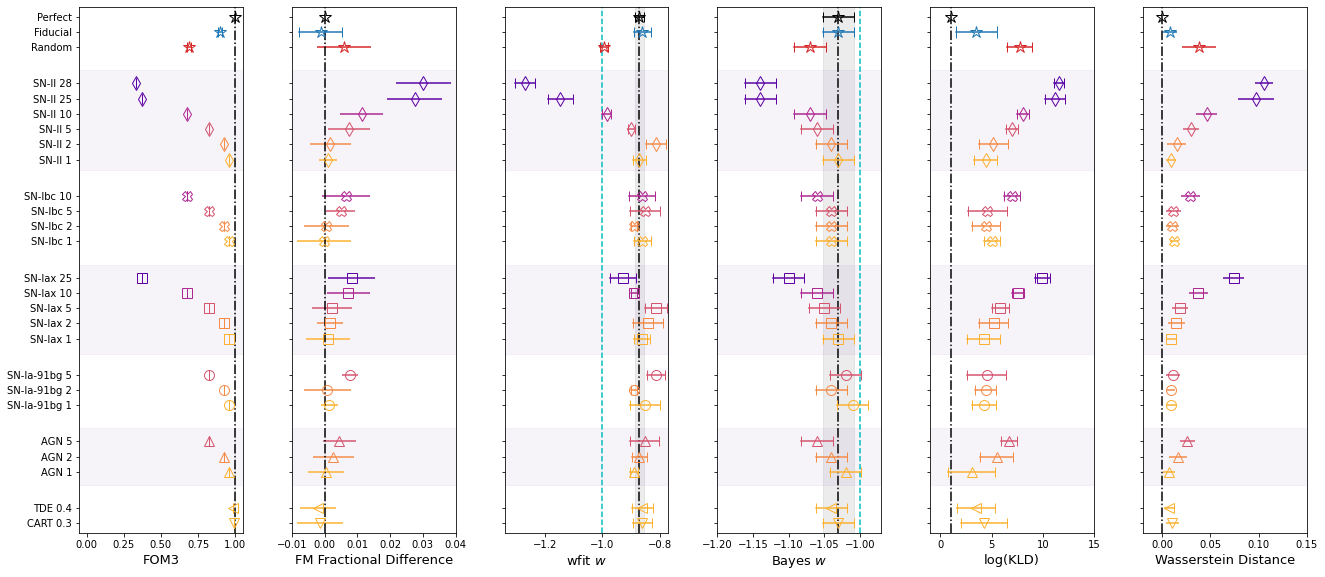

In [269]:
fig, axes = plt.subplots(1, 6, figsize=(22,10), sharey=True)

# wfit
ax1 = axes[2]

# Bayes
ax2 = axes[3]

ax1.axvline(-1, color='c', ls='--')
ax2.axvline(-1, color='c', ls='--')

wfit_perf_mean = np.mean(summary_dict['wfit']['perfect3000'])
wfit_perf_std = np.sqrt(sum([(item * item) for item in summary_dict['wfit_std']['perfect3000']])/5)

ax1.axvline(wfit_perf_mean, color='k', ls='-.')
ax1.axvspan(wfit_perf_mean - wfit_perf_std, 
            wfit_perf_mean +  wfit_perf_std, 
            alpha=0.15, color='grey')

stan_perf_mean =  np.mean(summary_dict['stan']['perfect3000'])
stan_perf_std = np.sqrt(sum([(item * item) for item in summary_dict['stan_std']['perfect3000']])/5)
ax2.axvline(stan_perf_mean, color='k', ls='-.')
ax2.axvspan(stan_perf_mean - stan_perf_std, 
            stan_perf_mean + stan_perf_std, 
            alpha=0.15, color='grey')

# FOM3
ax3 = axes[0]
fom_perf_mean =  np.mean(summary_dict['fom3']['perfect3000'])
fom_perf_std = np.std(summary_dict['fom3']['perfect3000'])
ax3.axvline(fom_perf_mean, color='k', ls='-.')
ax3.axvspan(fom_perf_mean - fom_perf_std, 
            fom_perf_mean +  fom_perf_std, 
            alpha=0.15, color='grey')

# Fisher
# percent different
ax4 = axes[1]
fisher_perf_mean =  np.mean(summary_dict['FM']['perfect3000'])
fisher_perf_std = np.std(summary_dict['FM']['perfect3000'])
ax4.axvline(fisher_perf_mean, color='k', ls='-.')
ax4.axvspan(fisher_perf_mean - fisher_perf_std, 
            fisher_perf_mean +  fisher_perf_std, 
            alpha=0.15, color='grey')


# Wasserstein
ax5 = axes[5]
ax5.axvline(0, color='k', ls='-.')


# KLD
ax6 = axes[4]
ax6.axvline(1, color='k', ls='-.')
#ax6.set_xscale('log')


i = 0
tick_lbls = []
i_list = []
for j, (a, c) in enumerate(zip(remap_dict, color_nums)):

    if True:
        # wfit
        wfw = np.array([np.mean(summary_dict['wfit'][a])])
        wfw_sig = np.array([np.sqrt(sum([(item * item) for item in summary_dict['wfit_std'][a]])/5)])

        #wfw = df['wfit_w_lowz'].loc[df['case'] == a].values
        #wfw_sig = df['wfit_wsig_lowz'].loc[df['case'] == a].values
        class_ = str.split(remap_dict[a])[0]
        
        # Fisher
        fm = np.array(np.nanmean(summary_dict['FM'][a]))
        fm_st = np.array(np.nanstd(summary_dict['FM'][a], ddof=1))
        
        # Wasserstein
        wsd = np.array([np.mean(summary_dict['Wasserstein'][a])])
        wsd_st = np.array([np.std(summary_dict['Wasserstein'][a], ddof=1)])
        
        # fom3
        #fom3 = df['fom3'].loc[df['case'] == a].values
        fom3 =  np.array([np.mean(summary_dict['fom3'][a])])
        fom3_sig = np.array([np.std(summary_dict['fom3'][a], ddof=1)])
        
        # KLD
        #kld = df['KLD'].loc[df['case'] == a].values
        kld = np.array(np.mean(summary_dict['KLD'][a]))
        kld_st = np.array(np.std(summary_dict['KLD'][a], ddof=1))

        if '91bg' in class_:
            class_ = 'SNIa-91bg'
        else:
            class_ = class_.replace('-', '')

        bad_data=False
        if wfw[0] < -2.2:
            wfw[0] = -1.4
            bad_data=True
            xuplims=[-1.5]
        
        if 'ddf' in file_extension:
            if 'fiducial' in a:
                mfc = 'tab:blue'
            elif 'random' in a:
                mfc = 'tab:red'
            elif 'perfect' in a:
                mfc = 'k'
            else:
                mfc = color_map[c]
        if 'wfd' in file_extension:
            mfc = "none"

        if 'fiducial' in a:
            if bad_data:
                ax1.errorbar(wfw, [-i], xerr=[0.03], marker='*',color='tab:blue',
                             xuplims=xuplims, markersize=12, mfc=mfc)
            else:
                ax1.plot(wfw, -i, '*', color='tab:blue', ms=12, mfc=mfc)
                ax1.plot([wfw - wfw_sig, wfw + wfw_sig], [-i, -i], "|-", color='tab:blue', ms=10)
        elif 'random' in a:
            if bad_data:
                ax1.errorbar(wfw, [-i], xerr=[0.03], marker='*',color='tab:red',
                             xuplims=xuplims, markersize=12, mfc=mfc)
            else:
                ax1.plot(wfw, -i, '*', color='tab:red', ms=12, mfc=mfc)
                ax1.plot([wfw - wfw_sig, wfw + wfw_sig], [-i, -i], "|-", color='tab:red', ms=10)
        elif 'perfect' in a:
            ax1.plot(wfw, -i, '*', color='k', ms=12, mfc=mfc)
            ax1.plot([wfw - wfw_sig, wfw + wfw_sig], [-i, -i], "|-", color='k', ms=10 )
        elif 'all_objs_survived' in a:
            ax1.plot(wfw, -i, '*', color='seagreen', ms=12, mfc=mfc)
            ax1.plot([wfw - wfw_sig, wfw + wfw_sig], [-i, -i], "|-", color='seagreen', ms=10 )
        else:
            if bad_data:
                ax1.errorbar(wfw, [-i], xerr=[0.03], marker=all_shapes[class_],color=color_map[c],
                             xuplims=xuplims, markersize=10)
            else:
                ax1.plot(wfw, -i, color=color_map[c], ms=10, marker=all_shapes[class_], mfc=mfc)
                ax1.plot([wfw - wfw_sig, wfw + wfw_sig], [-i, -i], "|-", color=color_map[c], ms=10)

        # Stan/Bayes
        bw = np.array([np.mean(summary_dict['stan'][a])])
        bw_sig = np.array([np.sqrt(sum([(item * item) for item in summary_dict['stan_std'][a]])/5)])
        #bw_sig = df['stan_wsig_lowz'].loc[df['case'] == a].values
        
        bad_data=False
        if bw[0] < -2.2:
            bw[0] = -1.4
            bad_data=True
            xuplims=[-1.5]

        if 'fiducial' in a:
            if bad_data:
                ax2.errorbar(bw, [-i], xerr=[0.03], marker='*',color='tab:blue',
                             xuplims=xuplims, markersize=12, mfc=mfc)
            else:
                ax2.plot(bw, -i, '*', color='tab:blue', ms=12, mfc=mfc)
                ax2.plot([bw - bw_sig, bw + bw_sig], [-i, -i], "|-", color='tab:blue', ms=10)
                ax3.plot(fom3, -i, '*', color='tab:blue', ms=12, mfc=mfc)
                ax3.plot([fom3 - fom3_sig, fom3 + fom3_sig], [-i, -i], "|-", color='tab:blue', ms=10)
                ax4.plot(fm, -i, '*', color='tab:blue', ms=12, mfc=mfc)
                ax4.plot([fm - fm_st, fm + fm_st], [-i, -i], "|-", color='tab:blue', ms=10)
                #ax4.errorbar(fm, np.array([-i]), xerr=fm_st, marker='*', color='tab:blue', ms=10, mfc=mfc)
                ax5.errorbar(wsd, np.array([-i]), xerr=wsd_st, marker='*', color='tab:blue', ms=12, mfc=mfc)
                ax6.plot(kld, np.array([-i]), marker='*', color='tab:blue', ms=12, mfc=mfc)
                ax6.plot([kld - kld_st, kld + kld_st], [-i, -i], "|-", color='tab:blue', ms=12)
      
        elif 'random' in a:
            if bad_data:
                ax2.errorbar(bw, [-i], xerr=[0.03], marker='*',color='tab:red',
                             xuplims=xuplims, markersize=12, mfc=mfc)
            else:
                ax2.plot(bw, -i, '*', color='tab:red', ms=12, mfc=mfc)
                ax2.plot([bw - bw_sig, bw + bw_sig], [-i, -i], "|-", color='tab:red', ms=10)
                ax3.plot(fom3, -i, '*', color='tab:red', ms=12, mfc=mfc)
                ax3.plot([fom3 - fom3_sig, fom3 + fom3_sig], [-i, -i], "|-", color='tab:red', ms=10)
                ax4.errorbar(fm, np.array([-i]), marker='*', xerr=fm_st, color='tab:red', ms=12, mfc=mfc)
                ax5.errorbar(wsd, np.array([-i]), marker='*', xerr=wsd_st, color='tab:red', ms=12, mfc=mfc)
                if kld > 750:
                    ax6.errorbar(700, [-i], xerr=[1e10], marker='*',color='tab:red',
                                 xlolims=True, xuplims=[900],
                                 markersize=12, mfc=mfc)
                else:
                    #ax6.semilogx(kld, -i, '*', color='tab:red', ms=12, mfc=mfc)
                    ax6.plot(kld, np.array([-i]), marker='*', color='tab:red', ms=12, mfc=mfc)
                    ax6.plot([kld - kld_st, kld + kld_st], [-i, -i], "|-", color='tab:red', ms=10)
        elif 'perfect' in a:
            ax2.plot(bw, -i, '*', color='k', ms=12, mfc=mfc)
            ax2.plot([bw - bw_sig, bw + bw_sig], [-i, -i], "|-", color='k', ms=10 )
            ax3.plot(fom3, -i, '*', color='k', ms=12, mfc=mfc)
            ax3.plot([fom3 - fom3_sig, fom3 + fom3_sig], [-i, -i], "|-", color='k', ms=10 )
            ax4.plot(0, -i, '*', color='k', ms=12, mfc=mfc)
            ax5.plot(0, -i, '*', color='k', ms=12, mfc=mfc)
            ax6.plot(1, -i, '*', color='k', ms=12, mfc=mfc)
        else:
            ax2.plot(bw, -i, color=color_map[c], ms=10, marker=all_shapes[class_], mfc=mfc)
            ax2.plot([bw - bw_sig, bw + bw_sig], [-i, -i], "|-", color=color_map[c], ms=10)
            ax3.plot(fom3, -i, color=color_map[c], ms=10, marker=all_shapes[class_], mfc=mfc)
            ax3.plot([fom3 - fom3_sig, fom3 + fom3_sig], [-i, -i], "|-", color=color_map[c], ms=10)
            ax4.errorbar(fm, np.array([-i]), xerr=fm_st, color=color_map[c], ms=10, marker=all_shapes[class_], mfc=mfc)
            ax5.errorbar(wsd, np.array([-i]), xerr=wsd_st, color=color_map[c], ms=10, marker=all_shapes[class_], mfc=mfc)
            if kld > 750:
                ax6.errorbar(700, [-i], xerr=[1e10],  marker=all_shapes[class_], color=color_map[c],
                                 xlolims=True, 
                                 markersize=10, mfc=mfc)
            
            else:
                ax6.plot(kld, -i, color=color_map[c], ms=10, marker=all_shapes[class_], mfc=mfc)
                ax6.plot([kld - kld_st, kld + kld_st], [-i, -i], "|-", color=color_map[c], ms=10)
                #ax6.errorbar(kld, np.array([-i]), xerr=kld_st,color=color_map[c], ms=10, marker=all_shapes[class_], mfc=mfc)
                #ax6.scatter(kld)
        
        tick_lbls.append(remap_dict[a])
        i_list.append(-i)
        i +=0.8
        
        if 'random' in a or '99SNIa1' in a:
            i_list.append(-i)
            i += 1.1
            tick_lbls.append('')
    #except:
    #    continue
        #print("Missing: ", a)

tick_locs = i_list[::-1]
ax1.set_yticks(tick_locs)
ax1.set_yticklabels(tick_lbls[::-1], fontsize=13)

ax1.set_ylim(i_list[-1]-0.5, i_list[0]+0.5)#-len(tick_lbls)+0.5, 0.5)


ax1.set_xlabel(r'wfit $w$', fontsize=13)
ax2.set_xlabel(r'Bayes $w$', fontsize=13)
ax3.set_xlabel('FOM3', fontsize=13)
ax4.set_xlabel('FM Fractional Difference', fontsize=13)
ax5.set_xlabel('Wasserstein Distance', fontsize=13)
ax6.set_xlabel('log(KLD)', fontsize=13)
plt.subplots_adjust(bottom=0.15, wspace=0.3) # wspace=0.05

if 'ddf' in file_extension:
    ax1.set_xlim(-1.44, -0.97)
    ax2.set_xlim(-1.44, -0.97)
    ax3.set_xlim(0, 1.05)
    ax4.set_xlim(-0.025, 0.05)
    ax5.set_xlim(-0.02, 0.22)
    ax6.set_xlim(1e5, 3e10)
if 'wfd' in file_extension:
    ax1.set_xlim(-1.34, -0.77)
    ax2.set_xlim(-1.2, -0.97)
    ax3.set_xlim(-0.05, 1.05)
    ax4.set_xlim(-0.01, 0.04)
    ax5.set_xlim(-0.02, 0.15)
    ax6.set_xlim(-1, 15)

if 'ddf' in file_extension:
    #ticks = [-4, -13, -19, -24, -27, -30]
    ticks = [-4, -11, -15, -21]
   
    for ax in axes:
        for t in ticks:
            yticks = ax.yaxis.get_major_ticks()
            yticks[t].set_visible(False)
        ax.axvspan(-2.3, 5e10, ymin=0.59, ymax=0.83, alpha=0.08, color='tab:purple')
        ax.axvspan(-2.3, 5e10, ymin=0.17, ymax=0.37, alpha=0.08, color='tab:purple')
    
if 'wfd' in file_extension:
    ticks = [-4, -11, -16, -22, -26, -30]
    
    for ax in axes:
        for t in ticks:
            yticks = ax.yaxis.get_major_ticks()
            yticks[t].set_visible(False)
        ax.axvspan(-1.5, 2e10, ymin=0.69, ymax=0.88, alpha=0.08, color='tab:purple')
        ax.axvspan(-1.5, 2e10, ymin=0.34, ymax=0.51, alpha=0.08, color='tab:purple')
        ax.axvspan(-1.5, 2e10, ymin=0.09, ymax=0.2, alpha=0.08, color='tab:purple')
    
plt.savefig('all_metrics_' + file_extension + '_lowz_redone.png', bbox_inches='tight')
#plt.show()


# read data for DDF to make metric vs metric plot

In [68]:
table_loc2 = '/media2/RESSPECT2/data/posteriors_ddf/omprior_0.01_flat/summary_cases_redone.csv' 
df = pd.read_csv(table_loc2)

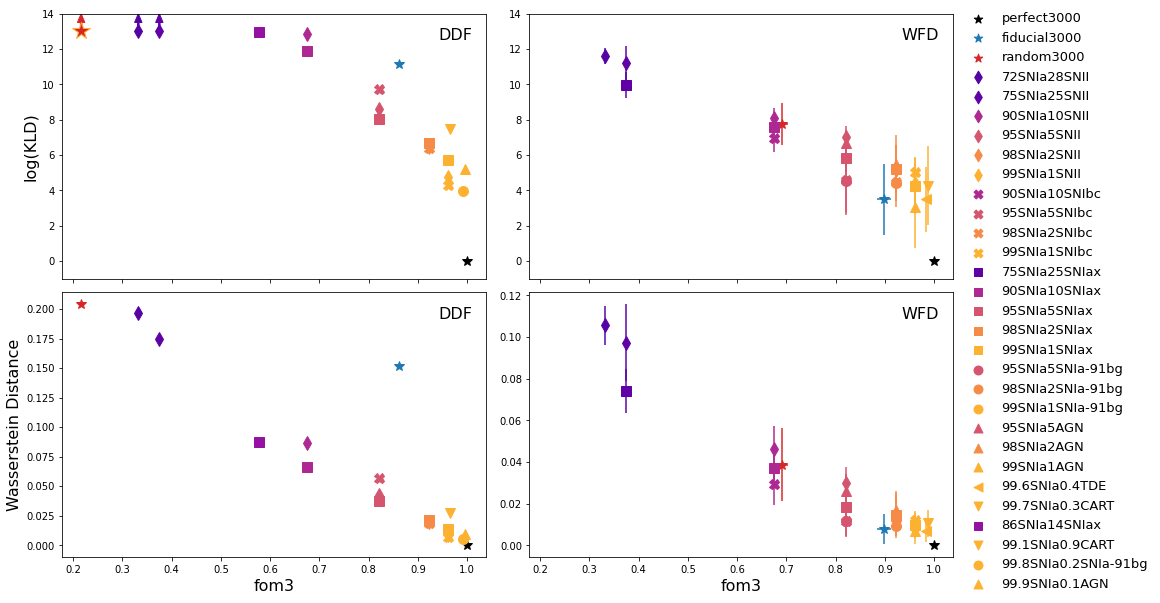

In [268]:
i = 0
tick_lbls = []
i_list = []

all_shapes['Perfect'] = '*'
all_shapes['Fiducial'] = '*'
all_shapes['Random'] = '*'


fig2, axes2 = plt.subplots(2, 2, figsize=(16,10), sharex=True)

ax1 = axes2[0][1]
ax2 = axes2[1][1]

ax3  = axes2[0][0]
ax4 = axes2[1][0]

legend = True
legends_done = []
legend_objs = []

for j, (a, c) in enumerate(zip(remap_dict, color_nums)):
    
    class_ = str.split(remap_dict[a])[0]
    
    flag1 = 'perfect' in a or 'random' in a
    flag_special = flag1 or 'fiducial' in a

    if '91bg' in class_:
        class_ = 'SNIa-91bg'
    else:
        class_ = class_.replace('-', '')

        
    if 'fiducial' in a:
        mfc = 'tab:blue'
    elif 'random' in a:
        mfc = 'tab:red'
    elif 'perfect' in a:
        mfc = 'k'
    else:
        mfc = color_map[c]
    
    fom3_wfd =  np.array([np.mean(summary_dict['fom3'][a])])
    fom3_sig_wfd = np.array([np.std(summary_dict['fom3'][a], ddof=1)])
    
    kld_wfd = np.array(np.mean(summary_dict['KLD'][a]))
    kld_st_wfd = np.array(np.std(summary_dict['KLD'][a], ddof=1))
    
    wsd_wfd = np.array([np.mean(summary_dict['Wasserstein'][a])])
    wsd_st_wfd = np.array([np.std(summary_dict['Wasserstein'][a], ddof=1)])    
    
    if flag_special:
        ax1.errorbar(fom3_wfd, kld_wfd, xerr=fom3_sig_wfd, yerr=kld_st_wfd, color=mfc, ms=10, marker=all_shapes[class_])
        ax2.errorbar(fom3_wfd, wsd_wfd, xerr=fom3_sig_wfd, yerr=wsd_st_wfd, color=mfc, ms=10, marker=all_shapes[class_])
    else:
        ax1.errorbar(fom3_wfd, kld_wfd, xerr=fom3_sig_wfd, yerr=kld_st_wfd, color=color_map[c], mfc=mfc, ms=10, marker=all_shapes[class_])
        ax2.errorbar(fom3_wfd, wsd_wfd, xerr=fom3_sig_wfd, yerr=wsd_st_wfd, color=color_map[c], mfc=mfc, ms=10, marker=all_shapes[class_])
        
    if a not in legends_done:
        legends_done.append(a)
        l1 = ax1.scatter([],[], color=mfc, s=80, marker=all_shapes[class_], label=a)
        legend_objs.append(l1)
        
        
for j, (a, c) in enumerate(zip(remap_dict_ddf, color_nums_ddf)):  
    
    class_ = str.split(remap_dict_ddf[a])[0]
    
    flag1 = 'perfect' in a or 'random' in a
    flag_special = flag1 or 'fiducial' in a

    if '91bg' in class_:
        class_ = 'SNIa-91bg'
    else:
        class_ = class_.replace('-', '')

    if 'fiducial' in a:
        mfc = 'tab:blue'
    elif 'random' in a:
        mfc = 'tab:red'
    elif 'perfect' in a:
        mfc = 'k'
    else:
        mfc = color_map[c]
            
    fom3_ddf = df['fom3'].loc[df['case'] == a].values
    
    if 'perfect' in a:
        kld_ddf = 0
        wsd_ddf = 0
    else:
        kld_ddf = np.log(df['KLD'].loc[df['case'] == a].values)
        wsd_ddf = df['WassersteinDistanceMedian'].loc[df['case'] == a].values
    
    
    if flag_special:
        ax4.plot(fom3_ddf, wsd_ddf, color=mfc, ms=10, marker=all_shapes[class_])
        
        # case where KLD explodes
        if 'random' in a:
            ax3.plot(fom3_ddf, [13], color=color_map[c], mfc=mfc, ms=18, marker=all_shapes[class_])
            ax3.arrow(fom3_ddf[0], 13, 0, 1, width=0.003, color=mfc, length_includes_head=True, head_width=0.015, head_length=0.5)
        else:
            ax3.plot(fom3_ddf, kld_ddf, color=mfc, ms=10, marker=all_shapes[class_])
    else:
        ax4.plot(fom3_ddf, wsd_ddf, color=color_map[c], mfc=mfc, ms=10, marker=all_shapes[class_])
    
        # cases where KLD explodes
        if '25SNII' in a or '28SNII' in a:
            lims = ax3.get_ylim()
            ax3.plot(fom3_ddf, [13], color=color_map[c], mfc=mfc, ms=10, marker=all_shapes[class_])
            ax3.arrow(fom3_ddf[0], 13, 0, 1, width=0.003, color=mfc, length_includes_head=True, head_width=0.015, head_length=0.5)
            
        else:
            ax3.plot(fom3_ddf, kld_ddf, color=color_map[c], mfc=mfc, ms=10, marker=all_shapes[class_])  
      
    
    if legend:
        field_label, = ax1.plot([],[], label='WFD', color='white')
        
        ax2.plot([],[], label='WFD', color='white')
        ax2.legend(frameon=False, fontsize=16)
        
        ax3.plot([],[], label='DDF', color='white')
        ax3.legend(frameon=False, fontsize=16)
        
        ax4.plot([],[], label='DDF', color='white')
        ax4.legend(frameon=False, fontsize=16)
        
        legend = False
    
    
    ax2.set_xlabel('fom3', fontsize=16)
    ax4.set_xlabel('fom3', fontsize=16)
    ax4.set_ylabel('Wasserstein Distance', fontsize=16)
    ax3.set_ylabel('log(KLD)', fontsize=16)
    #ax3.set_ylim(10, 6)
    
    if a not in legends_done:
        legends_done.append(a)
        l1 = ax1.scatter([],[], color=mfc, s=80, marker=all_shapes[class_], label=a)
        legend_objs.append(l1)

ax3.set_ylim(-1, 14)
ax1.set_ylim(-1, 14)

field_legend = ax1.legend(handles=[field_label], loc='upper right', fontsize=16, frameon=False)
ax = ax1.add_artist(field_legend)


handles, labels = ax1.get_legend_handles_labels()
#order = [-3,-1,-2] + list(range(len(labels) - 3))
ax1.legend(handles=legend_objs, frameon=False, bbox_to_anchor=(1, 1.05), labelspacing=0.5, fontsize=13)
plt.subplots_adjust(hspace=0.05, left=0.051, wspace=0.1, right=0.825)

plt.savefig('fom_KLD_WD.png')
#plt.show()

In [108]:
fom3_ddf

array([0.216195])

In [107]:
fom3_ddf = df['fom3'].loc[df['case'] == 'random3000'].values

In [168]:
lims[1] - 1e6

1500000.0

In [249]:
np.log(max(df['KLD']))

12.956240231604026